# 神经网络基础

## 0. 深度学习的标记法

### 0.1 神经网络的标记法

**一般标记 General comments**：

- 上标 $(i)$ 表示第 $i$ 个训练样本；上标 $[l]$ 表示第 $l$ 层。

**大小 Sizes**:

- $m$: 数据集中的样本数量

- $n_x$: 输入大小（特征数）

- $n_y$: 输出大小（分类的数量）

- $n_h^{[l]}$: 第 $l$ 层的隐藏神经元数量

- $L$: 神经网络的总层数

这样，在for循环中，可以定义 $n_x = n_h^{[0]}, n_y = n_h^{[L+1]}$

**对象 Objects**

- $X \in \mathbb{R}^{n_x \times m}$ 是输入矩阵

- $x^{(i)} \in \mathbb{R}^{n_x}$ 是第 $i$ 个样本，表示为一个 $n_x$ 维的列向量

- $Y \in \mathbb{R}^{n_y \times m}$ 是标签矩阵

- $y^{(i)} \in \mathbb{R}^{n_y}$ 是第 $i$ 个样本对应的标签，表示为一个 $n_y$ 维的列向量

- $W^{[l]} \in \mathbb{R}^{下一层的神经元数量 \times 上一层的神经元数量}$ 是权重矩阵，上标 $[l]$ 表示所在层

- $b^{[l]} \in \mathbb{R}^{下一层的神经元数量}$ 是第 $l$ 层的截距向量

- $\hat{y} \in \mathbb{R}^{n_y}$ 是预测结果向量，也可以表示为 $a^{[L]}$

**常见的前向传播公式**

- $ a = g^{[l]}(W_xx^{(i)} + b_1) = g^{[l]}(z_1)$, $g^{[l]}$表示第l层的激活函数
- $ \hat{y}^{(i)} = softmax(W_hh + b_2) $
- 一般的激活公式: $a_j^{[l]} = g^{[l]}(\sum_k w_{jk}^{[l]}a_k^{[l-1]} + b_j^{[l]}) = g^{[l]}(z_j^{[l]}) $
- $J(x,W,b,y)$ 或 $J(\hat{y}, y)$ 表示成本函数

**成本函数的例子**

- $J_{CE}(\hat{y}, y) = -\sum_{i=0}^m y^{(i)}log\hat{y}^{(i)}$
- $J_1(\hat{y}, y) = \sum_{i=0}^m |y^{(i)} - \hat{y}^{(i)}|$


### 0.2 深度学习的标记法

对于使用图结构来表示的神经网络

- 节点表示输入、激活单元或输出
- 变表示权重或截距

![examples of Standard deep learning representations](img/examples of Standard deep learning representations.png)

### 0.3 特别注意！

为了计算的便利，神经网络和传统机器学习在表示层面上，有这样两个显著的不同：

- 相对于传统机器学习，神经网络的输入矩阵 $X$ 是转置过的 $n \times m$ 矩阵，其中每一列是一个样本，每一行是一个特征。传统机器学习习惯上 $X$ 是一个 $m \times n$ 矩阵，其中每一行是一个样本，每一列是一个特征。相应的，标签矩阵 $y$ 也经过了转置。

- 在传统机器学习中，每个样本作为输入向量通常会加入一个 $x_0=1$ 的变量，使得输入矩阵成为 $m \times (n+1)$ 的矩阵，从而输入向量和权重相乘的计算可以写作 $\hat{y} = \theta^Tx$。神经网络中通常将截距项和权重项分开，等同于 $b=\theta_0$ 而 $w = [\theta_1;\theta_2;...;\theta_n]$。

## 1. 二分类

在二分类问题中，输出结果是离散型的二值。

例子：判定图片里是否包含猫

这里的目标是训练一个分类器，将图像作为输入并表示为特征向量 $x$，预测对应的标签 $y$ 是1还是0。在这里0、1的含义是这张图片包含猫（1）或不包含猫（0）。

![image to feature vector](img/image to feature vector.png)

在计算机中图像通常被存储成三个独立的矩阵，分别对应着图像的红、绿、蓝三个通道。三个矩阵和图片的像素大小相同，比如上面这张图片为64像素X64像素，相应地，三个矩阵（RGB）也都是 $64 \times 64$。

矩阵中的值表示着像素中对应通道颜色的强度，三个矩阵中的所有值一起构成了 $n$ 维的特征向量。在模式识别和机器学习中，特征向量表示一个对象，在这个例子中，表示图片包含猫或不包含猫。

要创建这个特征向量 $x$，所有的像素颜色强度将被重新整合。特征向量 $x$ 的维度为 $n_x = 64 \times 64 \times 3 = 12288$。

![feature vector](img/feature vector.png)

## 2. 逻辑回归

逻辑回归是一种解决监督学习中二分类问题的学习算法。逻辑学习的目标是最小化预测值和训练数据标签值之间的误差。

依然是训练识别猫的图片的分类器为例，给定一个特征向量 $x$，逻辑回归算法将能够给出图片中包含猫的概率

$$\hat{y} = P(y=1|x), 其中0 \leq \hat{y} \leq 1$$

逻辑回归中包含以下参数：

- 输入特征向量：$x \in \mathbb{R}^{n_x}$，其中 $n_x$ 是特征数
- 训练标签：$y \in \{0, 1\}$
- 权重：$w \in \mathbb{R}^{n_x}$，其中 $n_x$ 是特征数
- 阈值：$b \in \mathbb{R}$
- 输出：$\hat{y} = \sigma(w^Tx+b)$
- Sigmoid函数：$s = \sigma(w^Tx+b) = \sigma(z) = \frac{1}{1+e^{-z}}$

![sigmoid function](img/sigmoid function.png)

$(w^Tx+b)$ 是一个线性函数，由于这里我们需要一个概率表示，输出值需要在 $[0,1]$ 区间内，因此使用了Sigmoid函数。Sigmoid函数的值域为 $[0,1]$，如上图所示。

观察Sigmoid函数的图像，可以看到如下一些性质：

- 如果 $z$ 是一个非常大的正数，那么 $\sigma(z)=1$
- 如果 $z$ 非常小，或者说是一个非常大的负数，那么 $\sigma(z)=0$
- 如果 $z=0$，那么 $\sigma(z) = 0.5$

## 3. 逻辑回归的成本函数

训练模型获得参数 $w$ 和 $b$，需要首先定义**成本函数 cost function**

**损失函数 Loss function**:

损失函数衡量着预测值($\hat{y}^{(i)}$)和期望输出值($y^{(i)}$)之间的差异。换言之，损失函数计算单个训练样本的误差值。

$$ L(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2 $$
$$ L(\hat{y}^{(i)}, y^{(i)}) = -(y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)}))$$

其中，第一个平方误差的损失函数，会造成非凸的优化目标，逻辑回归通常使用第二个Logloss作为损失函数。

**成本函数 Cost function**:

成本函数是整个训练集中每个训练样本的损失函数值的均值。最终找到的参数 $w$ 和 $b$ 应该使全局的成本函数取得最小值。

$$ J(w, b) = \frac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})] $$

## 4. 导数、偏导、链式求导法则

复习一元函数导数、多元函数偏导、链式求导法则，不赘述。

## 5. 梯度下降

求成本函数的偏导，根据偏导和学习速率进行梯度更新。较为基础，不赘述。

## 6. 向量化

在用numpy写深度学习算法时，应当尽可能地避免使用for循环。numpy自带了很多方便的向量化操作，使用这些操作会比显式的for循环快得多。numpy底层的C或Fortran代码，会利用CPU的SIMD并行指令，在CPU层面实现单指令多数据流，从而更好地利用CPU的并行能力。同样的技巧也适用于GPU，事实上GPU对于处理这样SIMD指令的能力比CPU还强。

## 7. Show Me The Code

在这里，我们将构建一个逻辑回归分类器，用来识别包含猫的图片。

**要求：**
- 除非明确指出，在代码中不使用循环

**通过这个编程练习，可以学到：**
- 构建学习算法的基本架构，包括:
    - 初始化参数
    - 计算成本函数及其梯度
    - 使用优化算法（梯度下降）
- 将上述三个函数组合为模型函数

### 7.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [h5py](http://www.h5py.org) 是和存储为H5文件的数据集进行交互的通用包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- [PIL](http://www.pythonware.com/products/pil/) 和 [scipy](https://www.scipy.org/) 用来使用图片对模型进行测试。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### 7.2 问题总览

**问题表述**: 给定一个数据集（"data.h5"），包括：
    - 包含 m_train 张图片的训练集，标记为猫（y=1）或非猫（y=0）
    - 包含 m_test 张图片的测试集，标记为猫或非猫
    - 每张图片表示为 （num_px, num_px, 3）的矩阵，其中3表示RGB三通道。因而，每张图片都是正方形的（长=num_px，宽=num_px）

我们会构建一个简单的图像识别算法，这个算法希望能够准确地分类猫和非猫。

用下面的代码可以导入数据集。

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

这里我们对图像数据（包括训练和测试）加了后缀_orig，因为接下来我们会对这些数据进行预处理。预处理后会得到train_set_x和test_set_x。（train_set_y和test_set_y）不需要预处理。

train_set_x_orig和test_set_x_orig中的每一行代表了一张图片的数组表示。我们可以通过下面的代码进行可视化，改变`index`的值并重新执行，还可以看到其它的图片。

y = [1], it's a 'cat' picture.


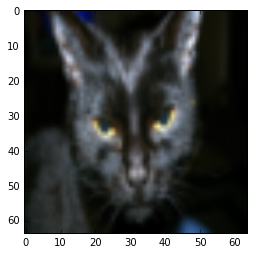

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

许多深度学习软件的bug都来自于矩阵或向量的维度不匹配。如果我们始终对矩阵或向量的维度有准确把握，开发的过程中可以消除很多bug。

**练习** 获得以下值:
    - m_train (训练集样本数)
    - m_test (测试集样本数)
    - num_px (训练图片的长和宽)
注意，`train_set_x_orig`是一个numpy数组，它的形状是 (m_train, num_px, num_px, 3)。比如，可以通过`train_set_x_orig.shape[0]`来获取`m_train`。

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**上面这段代码关于m_train, m_test 和 num_px的预期执行结果为**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>

为了运算方便，这里需要将 (num_px, num_px, 3) 形状的图片转换为 (num_px * num_px * 3) 的numpy数组。转换过后，训练集（测试集）的每一列代表平展之后的图片，总共有 m_train（m_test） 列。

In [5]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape((m_train, num_px * num_px * 3)).T
test_set_x_flatten = test_set_x_orig.reshape((m_test, num_px * num_px * 3)).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**预期执行结果**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

每个像素的RGB三通道值一起构成了整副图片，因此每个像素实际上是一个由三个数字组成的向量，每个数字的取值范围为0到255。

机器学习中一个常见的预处理方法是对数据进行标准化，意思是对numpy数组中的每个特征，减去其均值，再除以标准差。对于图片类型的数据，直接对所有值除以255（像素通道的最大值）会更方便，也同样有效。

在模型训练的过程中，首先权重和截距会和初始输入值进行运算来激活神经元，接下来使用梯度下降的反向传播来训练模型。所有特征有大致相当的值域这点十分重要，这样梯度才不会爆炸。后面的课程中会看到更多这样的例子。

接下来对数据进行标准化。

In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**请牢记：**

图片数据预处理的常见步骤：
- 弄清问题所需要的数据维度和矩阵形状（m_train, m_test, num_px, ...)
- 转换数据集的形状使得每个训练样本是一个 (num_px \* num_px \* 3, 1) 的向量
- 对数据进行标准化

### 7.3 学习算法的架构总览

这里我们将用神经网络的思维，来构造逻辑回归算法，对猫的图片进行分类。下面这幅图解释了，为什么说逻辑回归实际上是一个非常简单的神经网络。

<img src="img/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达**:

对于样本 $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

算法的成本是对所有训练样本的损失求和后取平均:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**:
在本练习中，需要完成以下步骤：
    - 初始化模型参数
    - 通过最小化成本，学得模型的参数
    - 使用学得的参数进行预测（针对测试集数据）
    - 分析结果并总结